# Mechanistic model development.

### Thursday, April 17, 2025. Jueves Santo.
### Ana Daniela del Río Pulido

In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
def channel(x, mu=1, sigma=1):
    
    return (np.exp(-(x-mu)**2/(2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

In [3]:
n_channels = 9
mus = np.asarray([50*i+50 for i in range(n_channels)])
sigmas = np.asarray([50 for i in range(n_channels)])

print(mus)
print(sigmas)

[ 50 100 150 200 250 300 350 400 450]
[50 50 50 50 50 50 50 50 50]


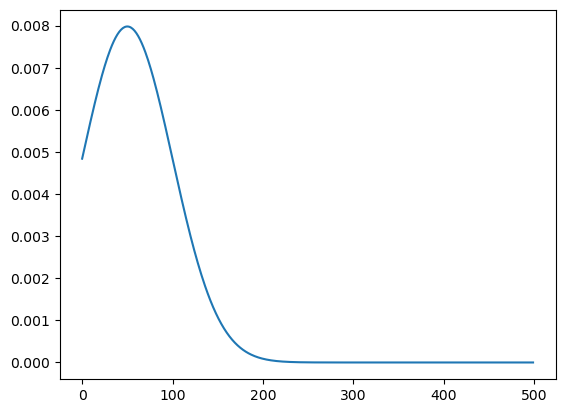

In [4]:
# Visualizing the channels

n_timepoints = 500
x = np.asarray([i for i in range(n_timepoints)])

channel_0 = channel(x, mus[0], sigmas[0])

plt.plot(x, channel_0)
plt.show()

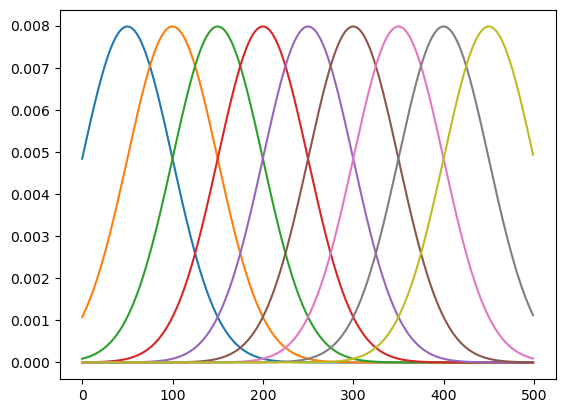

In [5]:
# Cool, now let's initialize a matrix.

channel_matrix = [channel(x, mus[i], sigmas[i]) for i in range(n_channels)]

for i in range(n_channels):
    plt.plot(x, channel_matrix[i])
plt.show()

### Cool. Now you defined the # of channels as well as their mus and sigmas.

### Now, randomize a set of weights in the [0,1] range for every channel.

In [7]:
weights = [rd.random()*2-1 for i in range(n_channels)] # Values in the [-1, 1] range.

### Output: obtain y for a single timepoint. That is, given a random stimulus in the {100, 140,..., 340}Hz range, obtain the single scalar value expected for that voxel at that timepoint.

In [9]:
stimulus = rd.randint(100,340)
print(stimulus)

269


In [10]:
def scalar_value(stimulus, weights, mus, sigmas):
    channel_values = np.asarray([channel(stimulus, mus[i], sigmas[i]) for i in range(n_channels)])
    y = np.sum(weights * channel_values)
    return y

In [11]:
scalar_value(stimulus, weights, mus, sigmas)

-0.0062998792261115735

### Cool cool. But you jumped. What is the backstory? Plot what you just calculated.

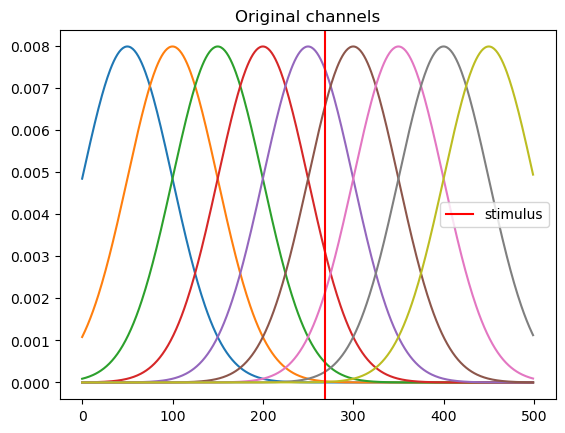

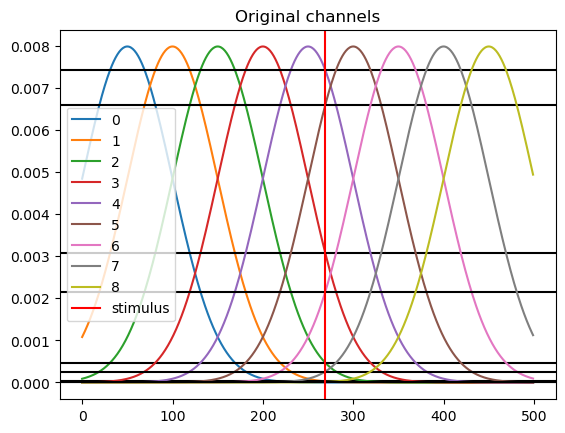

In [13]:
channel_values = np.asarray([channel(stimulus, mus[i], sigmas[i]) for i in range(n_channels)])

for i in range(n_channels):
    plt.plot(x, channel_matrix[i])
plt.axvline(x=stimulus, c="r", label = "stimulus")
plt.title("Original channels")
plt.legend()
plt.show()

for i in range(n_channels):
    plt.plot(x, channel_matrix[i], label=f"{i}")
    plt.axhline(y=channel_values[i], c='k')
plt.axvline(x=stimulus, c="r", label = "stimulus")
plt.title("Original channels")
plt.legend()
plt.show()

In [14]:
channel_values

array([5.44628711e-07, 2.63732178e-05, 4.69819707e-04, 3.07896574e-03,
       7.42307759e-03, 6.58367922e-03, 2.14812150e-03, 2.57842522e-04,
       1.13855957e-05])

### Now, if you just visualize the black lines and scale them by their respective weights, where do those dots fall on?

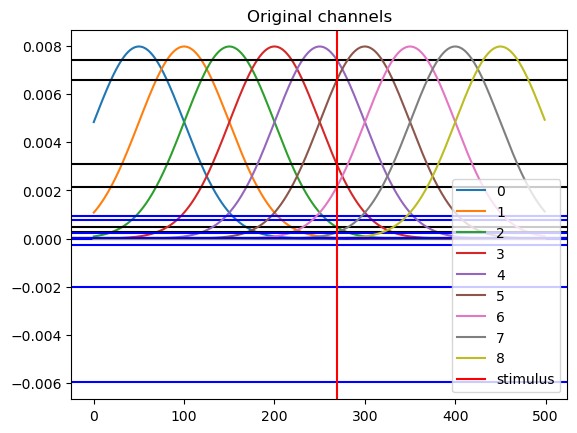

-0.0062998792261115735


In [16]:
for i in range(n_channels):
    plt.plot(x, channel_matrix[i], label=f"{i}")
    plt.axhline(y=channel_values[i], c='k')
    plt.axhline(y=channel_values[i]*weights[i], c='b')
    
plt.axvline(x=stimulus, c="r", label = "stimulus")
plt.title("Original channels")
plt.legend()
plt.show()

print(np.sum(channel_values*weights))

Cool. Now let's put it together.
### Create a function that creates a sequence of y values depending on the vector stimulus.
### yy = (y0, y1, …, yn)
### If s=0, then don’t calculate anything and output 0.


In [18]:
def yy_vector(stimulus_vec, weights, mus, sigmas): # Creates the vector of scalar values of y
    n = len(stimulus_vec)
    yy = np.zeros(n)
    for i in range(n):
        if stimulus_vec[i] == 0: # If the stimulus is 0, then don't calculate anything and output 0.
            yy[i] = 0
        else: # Calculates the y output for that timepoint.
            yy[i] = scalar_value(stimulus_vec[i], weights, mus, sigmas)
    # yy = np.asarray([scalar_value(stimulus_vec[i], weights, mus, sigmas) for i in range(n)])
    return yy

In [58]:
n_channels = 9
n_timepoints = 100

xx = np.asarray([i for i in range(n_timepoints)])

stimulus_vec = np.zeros(n_timepoints)
stimulus_vec[5] = rd.randint(100,340)
stimulus_vec[20] = rd.randint(100,340)
stimulus_vec[25] = rd.randint(100,340)
stimulus_vec[53] = rd.randint(100,340)
# stimulus_vec[88] = rd.randint(100,340)

weights = [rd.random()*2-1 for i in range(n_channels)] # Values in the [-1, 1] range.
mus = np.asarray([50*i+50 for i in range(n_channels)])
sigmas = np.asarray([50 for i in range(n_channels)])

# y = scalar_value(stimulus, weights, mus, sigmas)
yy = yy_vector(stimulus_vec, weights, mus, sigmas)

In [60]:
yy

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00790774,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00917056,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.01100947,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01275723,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

### Convolve yy with a typical HRF.

A typical HRF will be defined as in Friston 1998 using a linear combination of 2 gamma functions.
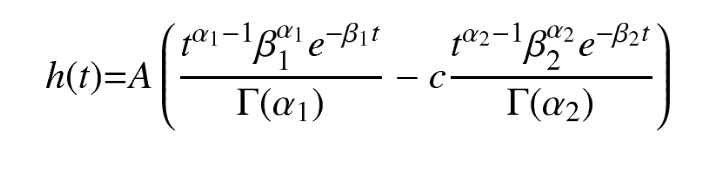

α1 = 6, α2 = 16, β1 = β2 = 1 and c = 1/6

$$h(t) = A\Big( \frac{t^{\alpha_1 - 1}\beta_1^{\alpha_1} e^{-\beta_1t}}{\Gamma(\alpha_1)}. - c \frac{t^{\alpha_2 - 1}\beta_2^{\alpha_2} e^{-\beta_2 t}}{\Gamma(\alpha_2)} \Big)$$

where

$\alpha_1 = 6$

$\alpha_2 = 16$

$\beta_1 = \beta_2 = 1$

$c = 1/6$

In [23]:
def HRF(t, A = 5, alpha_1 = 6, alpha_2 = 16, beta_1 = 1, beta_2 = 1, c = 1/6):
    numerator_1 = t**(alpha_1 - 1)*beta_1**(alpha_1) * np.exp(-beta_1*t)
    numerator_2 = t**(alpha_2 - 1)*beta_2**(alpha_2) * np.exp(-beta_2*t)
    return A * (numerator_1/math.gamma(alpha_1) - c*numerator_2/math.gamma(alpha_2))

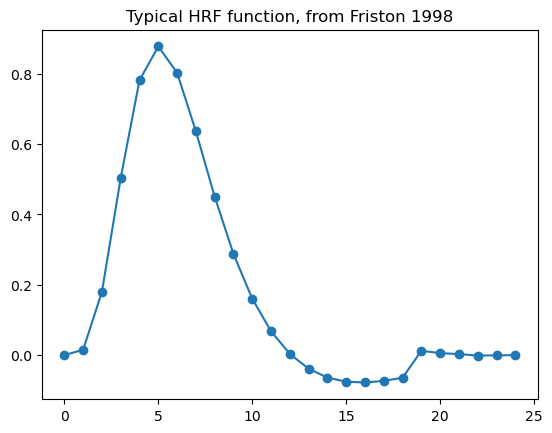

In [24]:
t = np.asarray([i for i in range(25)])
hrf = HRF(t)

plt.plot(t, hrf, marker='o')
plt.title("Typical HRF function, from Friston 1998")
plt.show()

Cool cool! Now you have an HRF!
### Convolve yy with a typical HRF.

In [26]:
# yy

WAIT A  SECOND!! THE X-ARRAYS OF THE HRF AND THE YY ARE DIFFERENT. How can we make the steps in x comparable to each other? Find the same scale for x.

In [28]:
BOLD_predicted = np.convolve(yy, hrf)

In [29]:
print(len(BOLD_predicted))
print(len(yy))
print(len(x))

124
100
100


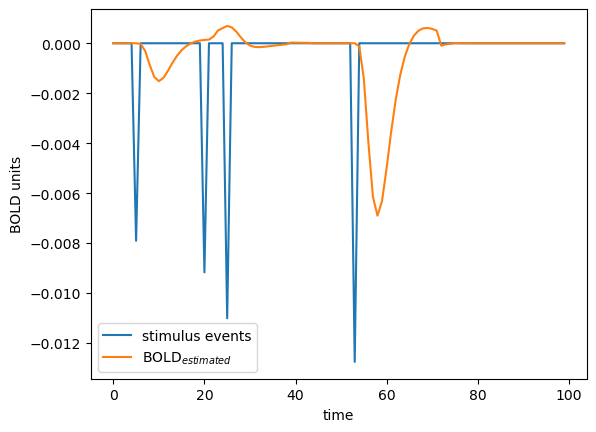

In [72]:
plt.plot(xx, yy, label="stimulus events")
plt.plot(xx, BOLD_predicted[:len(yy)], label=u"BOLD$_{estimated}$")
plt.xlabel("time")
plt.ylabel("BOLD units")
plt.legend()
plt.show()

Cool! You have now obtained the BOLD_{predicted}.

Now it is time to break. Upload the timeseries. Future: obtain the error signal and change the channel’s weights to minimize this error.
